# Objective

* Identify the Which Variable have more impact on Price of car 

* To build the Model which will help to Predict the Price of car based on Various parameter ( independent Variable ) 

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Shiva\Downloads\ML\Auto.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            156 non-null    float64
 1   Engine_size      156 non-null    float64
 2   Horsepower       156 non-null    int64  
 3   Wheelbase        156 non-null    float64
 4   Width            156 non-null    float64
 5   Length           156 non-null    float64
 6   Curb_weight      156 non-null    float64
 7   Fuel_capacity    156 non-null    float64
 8   Fuel_efficiency  156 non-null    int64  
 9   Resale           156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [5]:
df.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255


# EDA

#### Missing Value

In [6]:
df.isna().sum()  # no missing data

Price              0
Engine_size        0
Horsepower         0
Wheelbase          0
Width              0
Length             0
Curb_weight        0
Fuel_capacity      0
Fuel_efficiency    0
Resale             0
dtype: int64

# Outlier

<Axes: >

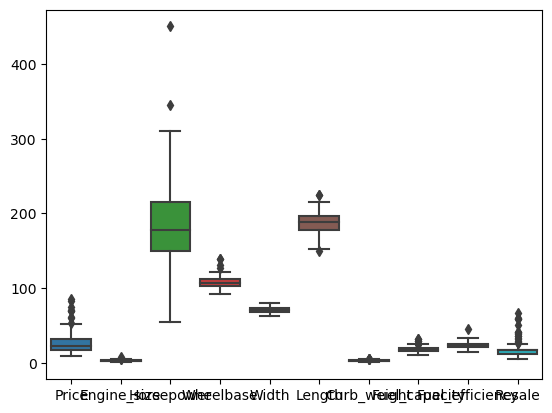

In [7]:
import seaborn as sns
sns.boxplot(data=df)

In [8]:
for i in df:
    print(i)

Price
Engine_size
Horsepower
Wheelbase
Width
Length
Curb_weight
Fuel_capacity
Fuel_efficiency
Resale


# Treatment of Outlier -- Winsorizing Technique

In [9]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

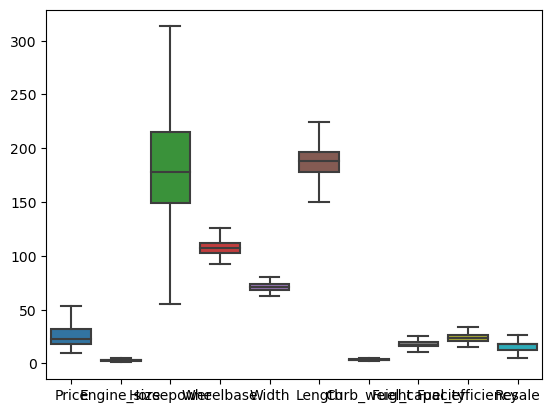

In [10]:
import seaborn as sns
sns.boxplot(data=df)

# Data Partition

In [11]:
X = df.drop('Price', axis= 1) # columns


y = df[['Price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [12]:
X

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875000
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,18.225000
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255000
...,...,...,...,...,...,...,...,...,...
151,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,18.061000
152,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,18.061000
153,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,18.061000
154,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,18.061000


In [13]:
y

,Price
0,21.50
1,28.40
2,35.00
3,42.00
4,23.99
...,...
151,24.40
152,27.50
153,28.80
154,45.50


In [14]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
131,18.835,2.2,137.0,106.5,69.0,190.4,3.075,13.1,27.0,18.061000
88,22.605,4.6,200.0,114.7,78.2,212.0,3.958,19.0,21.0,14.875000
8,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,26.410625
0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
122,25.635,3.4,185.0,120.0,72.7,201.3,3.942,25.0,23.0,18.061000


# Correlation

In [15]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
Price,1.000000,0.667309,0.886385,0.151918,0.340044,0.184254,0.580104,0.505469,-0.538885,0.813247
Engine_size,0.667309,1.000000,0.829458,0.502117,0.682777,0.577360,0.798542,0.712079,-0.758589,0.491024
Horsepower,0.886385,0.829458,1.000000,0.298277,0.512379,0.422161,0.640838,0.567119,-0.610716,0.695797
Wheelbase,0.151918,0.502117,0.298277,1.000000,0.680571,0.862125,0.681521,0.709292,-0.485593,0.057194
Width,0.340044,0.682777,0.512379,0.680571,1.000000,0.729054,0.707372,0.658170,-0.601092,0.206501
Length,0.184254,0.577360,0.422161,0.862125,0.729054,1.000000,0.637017,0.584920,-0.454935,0.082205
Curb_weight,0.580104,0.798542,0.640838,0.681521,0.707372,0.637017,1.000000,0.868244,-0.852497,0.471094
Fuel_capacity,0.505469,0.712079,0.567119,0.709292,0.658170,0.584920,0.868244,1.000000,-0.838215,0.381598
Fuel_efficiency,-0.538885,-0.758589,-0.610716,-0.485593,-0.601092,-0.454935,-0.852497,-0.838215,1.000000,-0.436586
Resale,0.813247,0.491024,0.695797,0.057194,0.206501,0.082205,0.471094,0.381598,-0.436586,1.000000


###### Correlation 
* Resale & Horsepower have high impact on Price of Car
* Multi-Colinearity is Present

# VIF

In [16]:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X1 = df.drop(['Price'],axis=1)
    series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                               for i in range(X1.shape[1])],  # i=0,1,2,...8
                              index=X1.columns)  # column name
    series_before

Engine_size          64.335386
Horsepower           65.006727
Wheelbase          1110.369198
Width               712.438964
Length              870.460280
Curb_weight         254.744942
Fuel_capacity       151.746109
Fuel_efficiency     120.651937
Resale               24.872637
dtype: float64

* Multi- colinearity is Present in Dataset

# Model Builiding

#### Method 2 -- Variable selection Method
1. Forward Selection Method
2. Backward Selection Method

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [18]:
Model.feature_names_in_

array(['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Resale'],
      dtype=object)

In [19]:
Model.get_feature_names_out()

array(['Horsepower', 'Wheelbase', 'Length', 'Curb_weight', 'Resale'],
      dtype=object)

#### Method 2 -- sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X_train = X_train.loc[:,['Horsepower','Wheelbase','Length', 'Curb_weight', 'Resale']]
X_train.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale
131,137.0,106.5,190.4,3.075,18.061000
88,200.0,114.7,212.0,3.958,14.875000
8,193.0,107.3,176.0,3.197,26.410625
0,140.0,101.2,172.4,2.639,16.360000
122,185.0,120.0,201.3,3.942,18.061000


In [22]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale,Price
131,137.0,106.5,190.4,3.075,18.061000,18.835
88,200.0,114.7,212.0,3.958,14.875000,22.605
8,193.0,107.3,176.0,3.197,26.410625,33.400
0,140.0,101.2,172.4,2.639,16.360000,21.500
122,185.0,120.0,201.3,3.942,18.061000,25.635


In [23]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [24]:
np.round(Model3.intercept_,3)

array([10.482])

In [25]:
np.round(Model3.coef_,4) 
# β values are also called weights(Research Paper), higher the β value that variable  
# will have most impact on future Predictios

array([[ 0.1498,  0.1926, -0.2609,  1.9822,  0.5931]])

In [26]:

Model3.feature_names_in_

array(['Horsepower', 'Wheelbase', 'Length', 'Curb_weight', 'Resale'],
      dtype=object)

#### Model

* y = 10.482 + 0.1498 * Horsepower + 0.1926 * Wheelbase - 0.2609 * Length + 1.9822 * Curb_weight + 0.5931 *Resale

# Prediction on Train

In [27]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.fitted_value,2) # error or residual
train.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale,Price,fitted_value,Residual
131,137.0,106.5,190.4,3.075,18.061000,18.835,18.65,0.19
88,200.0,114.7,212.0,3.958,14.875000,22.605,23.89,-1.28
8,193.0,107.3,176.0,3.197,26.410625,33.400,36.14,-2.74
0,140.0,101.2,172.4,2.639,16.360000,21.500,20.90,0.60
122,185.0,120.0,201.3,3.942,18.061000,25.635,27.31,-1.67


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  89.0


# Assumption of Linear Regression 

<Axes: title={'center': 'Price vs Resale'}, xlabel='Resale', ylabel='Price'>

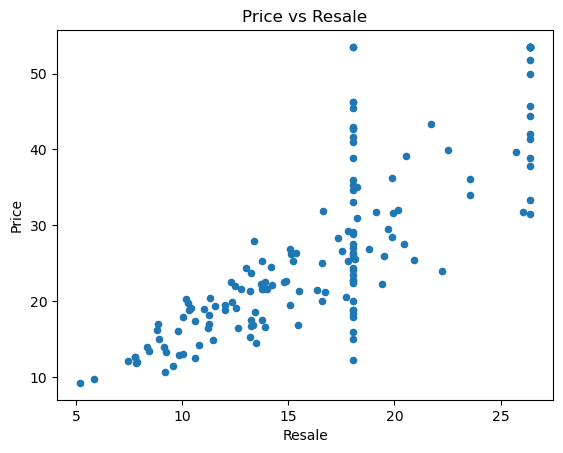

In [29]:
df.plot.scatter(x='Resale', y='Price', title='Price vs Resale')

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

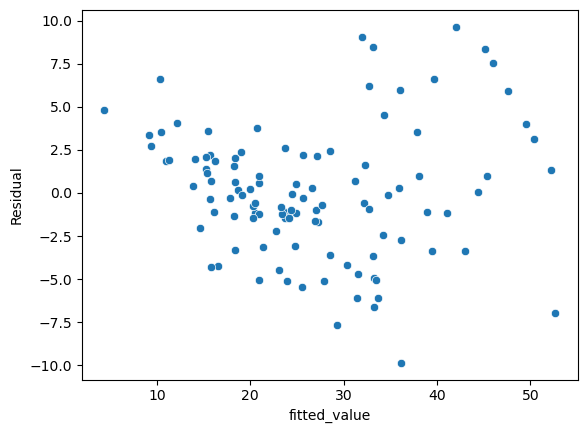

In [30]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

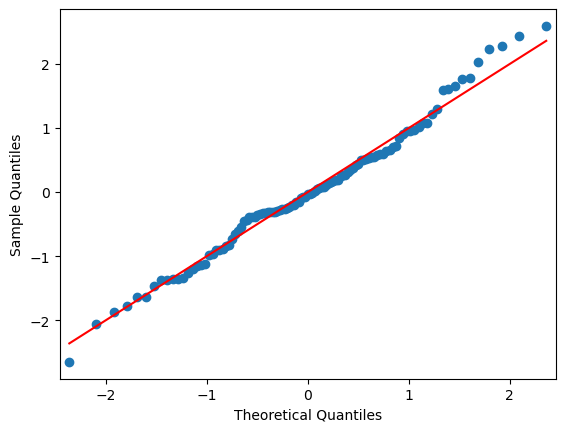

In [31]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<Axes: ylabel='Frequency'>

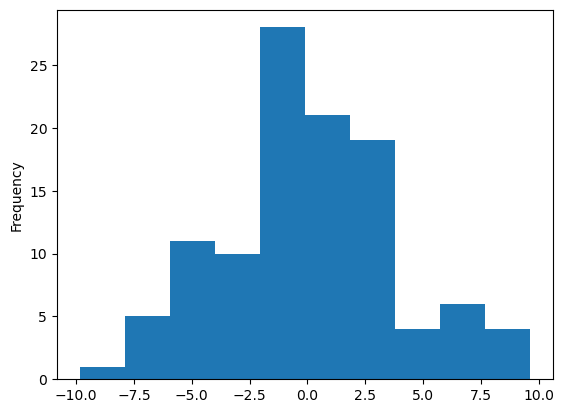

In [32]:
train['Residual'].plot.hist()

# Prediction on Test

In [33]:
X_test = X_test.loc[:,['Horsepower','Wheelbase','Length', 'Curb_weight', 'Resale']]
X_test.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale
99,215.0,111.0,180.6,4.387,18.061
25,120.0,97.1,174.3,2.398,9.125
12,205.0,113.8,206.8,3.778,20.190
146,150.0,106.4,184.1,3.043,16.725
61,92.0,96.1,166.7,2.240,5.860


In [34]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale,Price
99,215.0,111.0,180.6,4.387,18.061,35.300
25,120.0,97.1,174.3,2.398,9.125,13.960
12,205.0,113.8,206.8,3.778,20.190,31.965
146,150.0,106.4,184.1,3.043,16.725,21.200
61,92.0,96.1,166.7,2.240,5.860,9.699


In [35]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.Price - test.Prediction,2)
test.head()

,Horsepower,Wheelbase,Length,Curb_weight,Resale,Price,Prediction,Error / Residual
99,215.0,111.0,180.6,4.387,18.061,35.300,36.36,-1.06
25,120.0,97.1,174.3,2.398,9.125,13.960,11.85,2.11
12,205.0,113.8,206.8,3.778,20.190,31.965,28.62,3.34
146,150.0,106.4,184.1,3.043,16.725,21.200,21.36,-0.16
61,92.0,96.1,166.7,2.240,5.860,9.699,7.19,2.51


# Comparision

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  89.0


In [37]:
r2 = r2_score(test.Price,test.Prediction)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  81.0


# Loss Function -- RMSE

In [38]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Price'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  3.72


In [39]:
model_mse = mean_squared_error(test['Price'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  5.4


# Finished